# Lab 03:  Model Selection for Boston housing data

In this lab, you will apply polynomial regression with model order selection to the Boston housing dataset. 

Before doing this lab, you should review the ideas in the [polynomial model selection demo](./polyfit.ipynb).  In addition to the concepts in that demo, you will learn to:
* Load data
* Fit a polynomial model for a given model order 
* Select the model order via K-fold cross-validation and the one-standard-error rule.
  

## Loading the data

We first load the standard packages.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

We now load the Boston housing dataset, which happens to be pre-loaded into sklearn.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

Let's see what the dataset contains.

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


The structure `boston` is made up of
* `data`: which contains the information for various houses
* `target`: which contains their prices
* `feature_names`: which contains the names of the features, and
* `DESCR`: which describes the dataset
* `filename`: which shows where the file is stored on your local machine

Let's print the description.

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Let's turn this dataset into a `pandas` dataframe for ease of handling.

In [5]:
import pandas as pd
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df['MEDV'] = boston.target
df.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


Now, create the target vector `y` using the values in the column `MEDV` using the `numpy.array` command. 
Similarly, create the feature vector `x` using the values in the `LSTAT` column.

In [6]:
# TODO
y = np.array(df['MEDV'])# y = ...
x = np.array(df['LSTAT'])# X = ...

# Fitting Models with Different Orders
We will now fit the polynomial model to the data using order d = 1 and order d = 15, for illustration.

For this, we'll use the `polyfit` command of the `numpy.polynomial.polynomial` library.

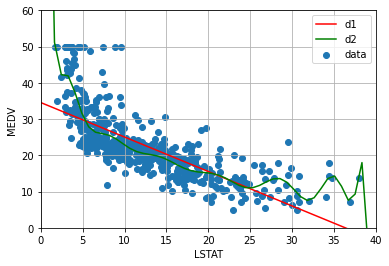

In [7]:
# TODO 
import numpy.polynomial.polynomial as poly# Import polynomial library
d1 = 1
d2 = 15# d1 = 1,d2 = 15
beta1 = poly.polyfit(x,y,d1)# beta1 = 
beta2 = poly.polyfit(x,y,d2)# beta2 =
xp = np.linspace(0,40,50)# xp = # grid of feature values
yp_hat1 = poly.polyval(xp,beta1)# yp_hat1 = # target prediction on grid using polynomial order d1
yp_hat2 = poly.polyval(xp,beta2)# yp_hat2 = # target prediction on grid using polynomial order d2
plt.xlim(0,40)
plt.ylim(0,60)
plt.scatter(x,y,label='data')
plt.plot(xp,yp_hat1,'r-',label='d1')
plt.plot(xp,yp_hat2,'g-',label='d2')# Make a scatterplot and superimpose prediction curves for d1 and d2
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.grid()
plt.legend()# Add grid lines, axis labels, and a legend


How do these two model orders perform?  Are the results as expected? Can we do better?

## K-fold Cross-Validation

We now optimize the polynomial model order using 5-fold cross-validation.  You can follow the method used in the polynomial demo.  The first step is to create a matrix of test RSS values over all hypothesized model orders and all splits.

In [8]:
from sklearn import model_selection

# TODO
# Create a k-fold object
k = 5# k = 5
kfo = model_selection.KFold(n_splits=k,shuffle=True)# kfo = ...
# Model orders to be tested
dtest = np.arange(0,10)# dtest = 
nd = len(dtest)# nd = len(dtest)
RSSts = np.zeros((nd,k))# RSSts = np.zeros((nd,k))
# enumerate returns a counter (isplit) and a list (Ind)
for isplit, Ind in enumerate(kfo.split(x)): # Loop over the folds
    Itr, Its = Ind # Get the training data in the split
    xtr = x[Itr]
    ytr = y[Itr]
    xts = x[Its]
    yts = y[Its]
    for it, d in enumerate(dtest):# Loop over the model order
        beta_hat = poly.polyfit(xtr,ytr,d)# Fit data on training data
        yhat = poly.polyval(xts,beta_hat)# Measure RSS on test data
        RSSts[it,isplit] = np.mean((yhat-yts)**2)# RSSts[it,itsplit] = 

Next, compute the mean and standard error of the RSS over the folds for each model order.  The standard error is defined as the standard deviation *$\sqrt{1/(K-1)}$, where $K$ is the number of folds.  We use $K-1$ to get an unbiased SE estimate.

With these RSS statistics, use the one-standard-error rule to find the best model order.  Print out the model order that minimizes mean test RSS, as well as the model order estimated by the one-standard-error rule.

In [9]:
# TODO
RSS_mean = np.mean(RSSts,axis=1)
RSS_se = np.std(RSSts,axis=1,ddof=1)/np.sqrt(k)# compute mean and standard error of RSS
imin = np.argmin(RSS_mean)# find model order that minimizes test RSS
dmin = dtest[imin]
print("The selected model order is {0:d}".format(dmin))# print("The model order that minimizes mean test RSS is ...")
RSS_tgt = RSS_mean[imin] + RSS_se[imin]# estimate model order according to the one-standard-error rule
I = np.where(RSS_mean <= RSS_tgt)[0]
iopt = I[0]
dopt = dtest[iopt]
print("The model order estimated by the one-standard-error rule is {0:d}".format(dopt))# print("The model order estimated by the one-standard-error rule is ...")

The selected model order is 5
The model order estimated by the one-standard-error rule is 2


Next, illustrate the one-standard-error-rule procedure by making a plot that shows the following:
* the mean test RSS curve with errorbars
* a dashed line showing the model order yielding minimum mean test RSS
* a dashed line showing the target RSS
* a dashed line showing the model order estimated by the one-standard-error rule

Also, add a grid and axis labels to your plot.  Use ylim if needed to zoom into the relevant range.

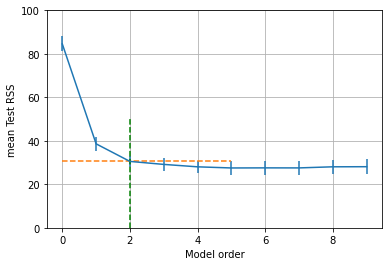

In [10]:
# TODO
plt.errorbar(dtest, RSS_mean, yerr=RSS_se, fmt='-')
plt.plot([dtest[0],dtest[imin]], [RSS_tgt, RSS_tgt], '--')
plt.plot([dopt,dopt], [0,50], 'g--')
plt.ylim(0,100)
plt.xlabel('Model order')
plt.ylabel('mean Test RSS')
plt.grid()

Finally, make a scatter plot of the data and superimpose
* the polynomial prediction curve with the order that minimizes mean RSS
* the polynomial prediction curve with the order selected by the one-standard-error rule

As usual, add grid lines, axis labels, and a legend to your curve

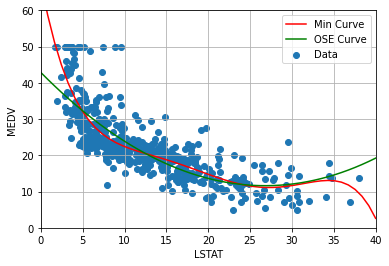

In [12]:
# fit the model
d1 = dmin# compute the polynomial prediction curve
d2 = dopt
beta1 = poly.polyfit(x,y,d1)# beta1 = 
beta2 = poly.polyfit(x,y,d2)# beta2 =
xp = np.linspace(0,40,50)# xp = # grid of feature values
yp_hat1 = poly.polyval(xp,beta1)# yp_hat1 = # target prediction on grid using polynomial order d1
yp_hat2 = poly.polyval(xp,beta2)# yp_hat2 = # target prediction on grid using polynomial order d2
plt.xlim(0,40)
plt.ylim(0,60)
plt.scatter(x,y,label='Data')# make scatterplot and superimpose curves
plt.plot(xp,yp_hat1,'r-',label='Min Curve')
plt.plot(xp,yp_hat2,'g-',label='OSE Curve')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.grid()
plt.legend()# add legend, axis labels, grid

$\alpha^2$